In [1]:
# !pip install tensorflow
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

from keras.utils.np_utils import to_categorical

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout
from keras.layers.advanced_activations import LeakyReLU

# Task 1

In [2]:
table = pd.read_csv('gender_classification.csv')

In [3]:
print(table.shape)

(5001, 8)


In [4]:
table.describe()

,LongHair,ForeheadWidth,ForeheadHeight,NoseWide,NoseLong,LipsThin,DistanceNoseToLipLong,Gender
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.00000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900,0.50010
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049,0.50005
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000,1.00000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000,1.00000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000,1.00000


In [5]:
def label_encoder(x):
    labelEncoder = LabelEncoder()
    table[x] = labelEncoder.fit_transform(table[x])

categories = ['LongHair', 'ForeheadWidth', 'ForeheadHeight', 'NoseWide', 'NoseLong','LipsThin', 'DistanceNoseToLipLong', 'Gender']

for label in categories:
    label_encoder(label)

In [6]:
print(table.shape)

(5001, 8)


In [7]:
table.describe()

,LongHair,ForeheadWidth,ForeheadHeight,NoseWide,NoseLong,LipsThin,DistanceNoseToLipLong,Gender
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.00000
mean,0.869626,17.814837,8.463107,0.493901,0.507898,0.493101,0.498900,0.50010
std,0.336748,11.071283,5.412679,0.500013,0.499988,0.500002,0.500049,0.50005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,8.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,17.000000,8.000000,0.000000,1.000000,0.000000,0.000000,1.00000
75%,1.000000,26.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.00000
max,1.000000,41.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [8]:
X = table.drop('Gender', axis = 1)
Y = table['Gender']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 40)

In [9]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [10]:
amount_of_classes = Y_test.shape[1]

In [11]:
print(amount_of_classes)

2


In [12]:
model = Sequential()
model.add(Dense(80, activation = 'relu', input_dim = 7))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

In [13]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
model.fit(X_train, Y_train, epochs = 100)

Epoch 1/100
110/110 [==============================] - 1s 3ms/step - loss: 0.5789 - accuracy: 0.6889
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1819 - accuracy: 0.9446
Epoch 3/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1088 - accuracy: 0.9551
Epoch 4/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0980 - accuracy: 0.9611
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0886 - accuracy: 0.9669
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0827 - accuracy: 0.9689
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0809 - accuracy: 0.9657
Epoch 8/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0815 - accuracy: 0.9671
Epoch 9/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0748 - accuracy: 0.9680
Epoch 10/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0712 - accura

110/110 [==============================] - 0s 3ms/step - loss: 0.0536 - accuracy: 0.9794
Epoch 82/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9786
Epoch 83/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0525 - accuracy: 0.9803
Epoch 84/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9809
Epoch 85/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0511 - accuracy: 0.9786
Epoch 86/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0489 - accuracy: 0.9831
Epoch 87/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0482 - accuracy: 0.9791
Epoch 88/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0485 - accuracy: 0.9800
Epoch 89/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0531 - accuracy: 0.9794
Epoch 90/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0485 - accuracy: 

# Task 2

In [15]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.cifar100.load_data()

In [16]:
print(train_features.shape)
print(test_features.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [17]:
train_features = train_features.astype('float32') / 255
test_features = test_features.astype('float32') / 255

In [18]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

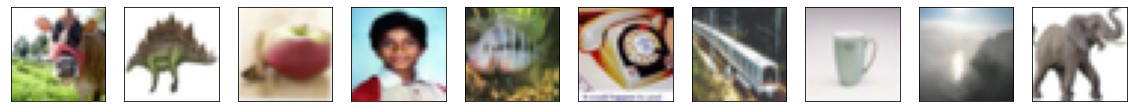

In [19]:
n = 10
plt.figure(figsize = (20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_features[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [20]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = train_features.shape[1:], padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(100, activation = 'softmax'))

In [21]:
model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])

In [22]:
model.fit(train_features, train_labels, validation_data = (test_features, test_labels), batch_size = 64, epochs = 20)

Epoch 1/20
782/782 [==============================] - 79s 100ms/step - loss: 0.0575 - accuracy: 0.0555 - val_loss: 0.0501 - val_accuracy: 0.1435
Epoch 2/20
782/782 [==============================] - 77s 98ms/step - loss: 0.0452 - accuracy: 0.1719 - val_loss: 0.0430 - val_accuracy: 0.2340
Epoch 3/20
782/782 [==============================] - 77s 98ms/step - loss: 0.0411 - accuracy: 0.2435 - val_loss: 0.0393 - val_accuracy: 0.2884
Epoch 4/20
782/782 [==============================] - 75s 96ms/step - loss: 0.0381 - accuracy: 0.2991 - val_loss: 0.0369 - val_accuracy: 0.3275
Epoch 5/20
782/782 [==============================] - 76s 97ms/step - loss: 0.0357 - accuracy: 0.3469 - val_loss: 0.0347 - val_accuracy: 0.3681
Epoch 6/20
782/782 [==============================] - 54s 69ms/step - loss: 0.0337 - accuracy: 0.3842 - val_loss: 0.0335 - val_accuracy: 0.3909
Epoch 7/20
782/782 [==============================] - 46s 59ms/step - loss: 0.0320 - accuracy: 0.4193 - val_loss: 0.0334 - val_accuracy

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                      

In [24]:
scores = model.evaluate(test_features, test_labels, verbose=0)
print(f'Accuracy: {scores[1]}')

Accuracy: 0.4717999994754791


In [25]:
print(f'Loss: {scores[0]}')

Loss: 0.031245531514286995


# Task 3

In [26]:
textData = pd.read_csv("task_3_data.csv")

In [27]:
textData.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [28]:
textData = textData.drop(['Name'] ,1)
textData.head()

C:\Users\DMYTRO~1\AppData\Local\Temp/ipykernel_6884/2009274178.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  textData = textData.drop(['Name'] ,1)


,Date,Open,High,Low,Close,Volume
0,2006-01-03,10.34,10.68,10.32,10.68,201853036
1,2006-01-04,10.73,10.85,10.64,10.71,155225609
2,2006-01-05,10.69,10.70,10.54,10.63,112396081
3,2006-01-06,10.75,10.96,10.65,10.90,176139334
4,2006-01-09,10.96,11.03,10.82,10.86,168861224


<AxesSubplot:>

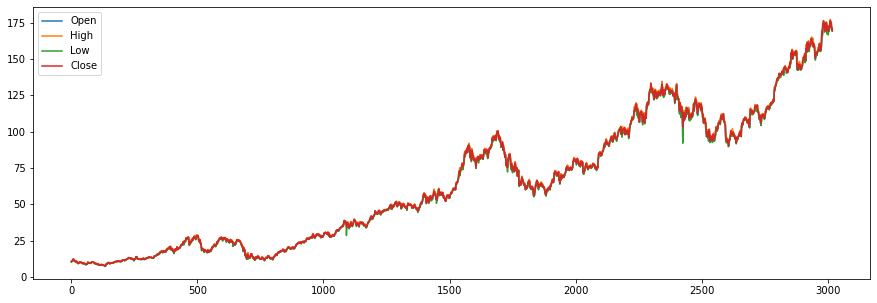

In [29]:
textData[['Open', 'High', 'Low', 'Close']].plot(figsize = (15, 5))

In [30]:
X = textData.drop(['Date','Close'], 1);
Y = textData['Close']

C:\Users\DMYTRO~1\AppData\Local\Temp/ipykernel_6884/2062307323.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = textData.drop(['Date','Close'], 1);


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [32]:
model = Sequential()

model.add(Dense(10))
model.add(Flatten())
model.add(Dense(13, activation = 'relu'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error', optimizer = 'adam')

model.fit(X_train, Y_train, epochs = 20, batch_size = 32)

Epoch 1/20
67/67 [==============================] - 0s 620us/step - loss: 346494137794560.0000
Epoch 2/20
67/67 [==============================] - 0s 611us/step - loss: 65174035759104.0000
Epoch 3/20
67/67 [==============================] - 0s 604us/step - loss: 19580575547392.0000
Epoch 4/20
67/67 [==============================] - 0s 589us/step - loss: 8769623818240.0000
Epoch 5/20
67/67 [==============================] - 0s 589us/step - loss: 5428973404160.0000
Epoch 6/20
67/67 [==============================] - 0s 604us/step - loss: 3867608612864.0000
Epoch 7/20
67/67 [==============================] - 0s 589us/step - loss: 2039573774336.0000
Epoch 8/20
67/67 [==============================] - 0s 604us/step - loss: 1263350579200.0000
Epoch 9/20
67/67 [==============================] - 0s 696us/step - loss: 793636175872.0000
Epoch 10/20
67/67 [==============================] - 0s 604us/step - loss: 688809967616.0000
Epoch 11/20
67/67 [==============================] - 0s 589us/step 

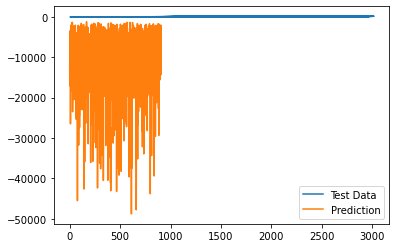

In [33]:
prediction = model.predict(X_test)

plt.plot(Y_test, label = 'Test Data') 
plt.plot(prediction, label = 'Prediction') 
plt.legend()
plt.show() 